# Preface

In [1]:
import pandas as pd
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist

from rethinking import LM, coef

In [2]:
sns.set(font_scale=1.25, rc={"figure.figsize": (8, 6)})

pyro.enable_validation()
pyro.set_rng_seed(1)

### Code 0.1

In [3]:
print("All models are wrong, but some are useful.")

All models are wrong, but some are useful.


### Code 0.2

In [4]:
x = torch.arange(1., 3)
x = x * 10
x = x.log()
x = x.sum()
x = x.exp()
x

tensor(200.0000)

### Code 0.3

In [5]:
print(torch.tensor(0.01).pow(200).log())
print(200 * torch.tensor(0.01).log())

tensor(-inf)
tensor(-921.0341)


### Code 0.4

{'Intercept': tensor(-17.4704), 'speed': tensor(3.9261), 'sigma': tensor(15.0113)}


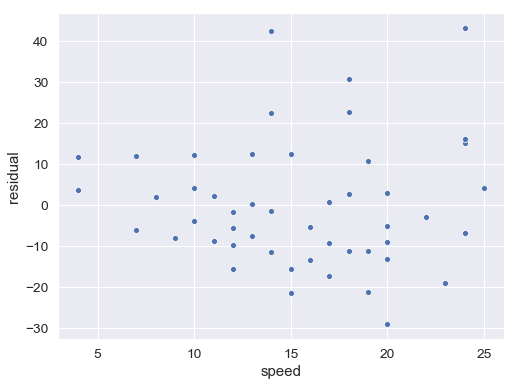

In [6]:
# Load the data:
# car braking distances in feet paired with speeds in km/h
# see cars.info() for details
cars = pd.read_csv("../data/cars.csv")

# fit a linear regression of distance on speed
m = LM("dist ~ speed", data=cars).run()

# estimated coefficients from the model
print(coef(m))

# plot residuals against speed
y = coef(m)["Intercept"].item() + coef(m)["speed"].item() * cars["speed"]
resid = cars["dist"] - y
ax = sns.scatterplot(cars["speed"], resid)
ax.set(xlabel="speed", ylabel="residual");

### Code 0.5

```sh
pip install jupyter pandas pyro-ppl seaborn torch
```